In [2]:
medical_charge_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve
import sys
sys.executable

'/home/ai/venv-Linear_R/bin/python'

In [4]:
#Downloading dataset
urlretrieve(medical_charge_url, 'medical-charge.csv')

('medical-charge.csv', <http.client.HTTPMessage at 0x77d204104080>)

In [5]:
import numpy as np, pandas as pd, seaborn as sns

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

#Make sure charts display inside notebook
%matplotlib inline

In [7]:
#OneHotEncoder for categorial data
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
medical_charges = pd.read_csv('medical-charge.csv')

In [9]:
medical_charges.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
medical_charges.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [11]:
medical_charges.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
medical_charges

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
medical_charges.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


In [14]:
medical_charges['charges'].corr(medical_charges['age'])

np.float64(0.2990081933306476)

In [15]:
fig = px.histogram(medical_charges,
                   x = 'bmi',
                   marginal='box',
                   title = "BMI")
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_charges,
                   x = "children",
                   marginal='box',
                   color = "smoker",
                   title = "Childrens")
fig.update_layout(bargap = 0.1)
fig.show()

In [23]:
fig = px.histogram(medical_charges,
                   x = "charges",
                   marginal='box',
                   color = "smoker",
                   title = "Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [24]:
fig = px.histogram(medical_charges,
                   x = "smoker",
                   marginal='box',
                   color = "sex",
                   title = "Charges")
fig.update_layout(bargap = 0.1)
fig.show()

In [ ]:
fig = px.histogram(medical_charges,
                   x = 'age',
                   marginal='box',
                   nbins=47,
                   title="Age_hist")
fig.update_layout(bargap = 0.1)
fig.show()

In [25]:
fig = px.scatter(medical_charges,
                 x = 'age',
                 y = 'charges',
                 hover_data = 'sex',
                 opacity=0.8,
                 color = 'smoker',
                 title= 'Age against charges')
fig.show()

In [26]:
fig = px.scatter(medical_charges,
                 x = 'bmi',
                 y = 'charges',
                 hover_data = 'sex',
                 opacity=0.8,
                 color = 'smoker',
                 title= 'Age against charges')
fig.show()

In [47]:
smoker = medical_charges.smoker.map({'yes': 1, 'no': 0})
#smoker = medical_charges.map({'smoker' : {'yes':1, 'no' : 0}})
smoker

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [46]:
#Encoding categorial region column as region_northwest, region_southeast, etc.
ohe = OneHotEncoder(sparse_output = False)
region_enc = ohe.fit_transform(medical_charges[['region']])

region_df = pd.DataFrame(region_enc, columns = ohe.get_feature_names_out(None))
region_df

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [36]:
#Variables for frequently used columns
target = medical_charges.charges
age = medical_charges.age
bmi = medical_charges.bmi
children = medical_charges.children
region_northwest = region_df.region_northwest
region_southeast = region_df.region_southeast
region_southwest = region_df.region_southwest
region_northeast = region_df.region_northeast

In [51]:
target.corr(smoker)

np.float64(0.787251430498478)

In [58]:
sns.heatmap(medical_charges.corr(),cmap='Reds', annot=True)
plt.title("Heatmap")
plt.show()

ValueError: could not convert string to float: 'female'

In [49]:
def train(age, bmi, children, smoker, weight, bias):
    return weight*(age+bmi+children+smoker) + bias

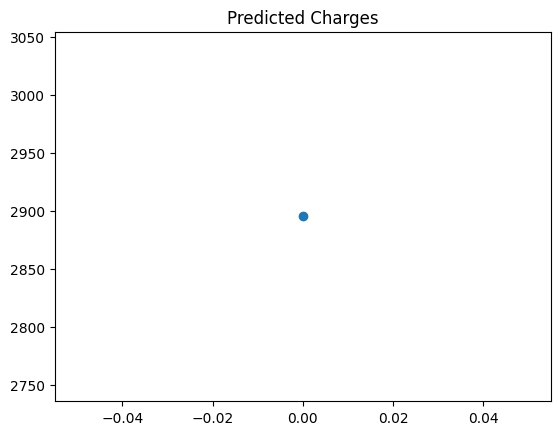

In [50]:
w = 50
b = 500
prediction = train(19, 27.9, 0, 1, w, b)
plt.title('Predicted Charges')
plt.plot(prediction, 'o')
plt.show()